##  1.0 Setup and install dependencies

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [7]:
import tensorflow as tf
import os

In [5]:
# its just to avoid out of memory issues for gpu memory.
gpus =  tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)


### 1.1 Remove dodgy images

In [5]:
import cv2 
import imghdr
import matplotlib.pyplot as plt

In [7]:
data_dir = "data"
img_exts = ["jpg", "png", "bmp","jpeg"]


### how read a image

(1440, 1920, 3)


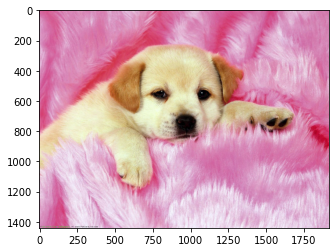

In [10]:
image = cv2.imread(os.path.join(data_dir,"Happy","327879.jpg")) #reading image
print(image.shape)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB)) #to convert BGR colour to RGB (cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.show()

#### removing the images which are not in proper extension format.

In [12]:
for image_class in os.listdir(data_dir):
    #print(image_class)
    for image in os.listdir(os.path.join(data_dir,image_class)):
        #print(image)
        image_path = os.path.join(data_dir,image_class,image)
        #print(image_path)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path) # this will give the extension of the image.
            if tip not in img_exts:
                print(f"{image_path} extension is not in img_exts")
                os.remove(image_path)
        except Exception as e:
            print(f"issue with {image_path}")


##  1.2 Load data

In [13]:
tf.keras.utils.image_dataset_from_directory??
'''t
his keras's default function will create the data-generatir and load the images from given directory and will get the labels from the folder names
and will resize your images and send the images to the model in 32 batch size as default
'''

"t\nhis keras's default function will create the data-generatir and load the images from given directory and will get the labels from the folder names\nand will resize your images and send the images to the model in 32 batch size as default\n"

In [14]:
data = tf.keras.utils.image_dataset_from_directory(data_dir) # thsi will create a data-generator

Found 138 files belonging to 2 classes.


In [15]:
data_generator = data.as_numpy_iterator() # this will create a iterator to access the data

In [16]:
Batch = data_generator.next() # finally accessing the data.
len(Batch) # it is 2 as our images and labels.

2

In [17]:
# Batch[0] numpy array  representaion of images as follows:
Batch[0]
len(Batch[0]) #this will represent first batch of images which is contaning 32 images according to the batch size.

32

In [18]:
# Batch[1] numpy  array representation of labels as follows:
Batch[1]
len(Batch[1])

32

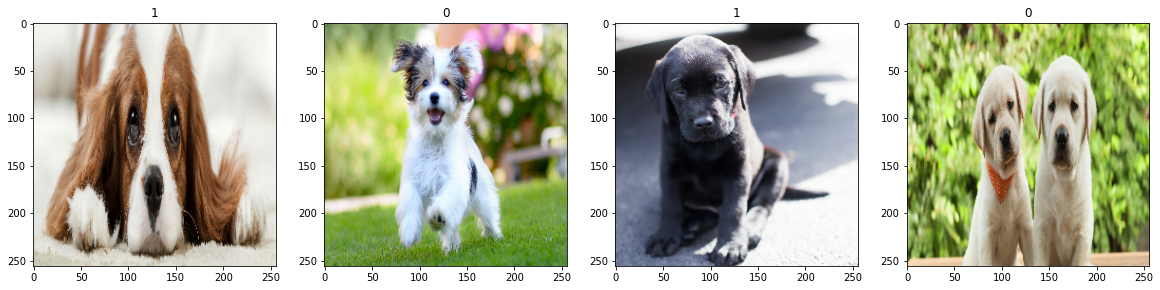

In [19]:
fig,ax = plt.subplots(ncols=4,figsize=(20,10))
for idx,img in enumerate(Batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(Batch[1][idx])


->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->

## 2.0 Preprocessing data

### 2.1 scaling data
##### why to scale data,in section 1.2 while loading data we are using keras utils functionility in which keras will convert our data into numpy data using data pipeline,our image data will always have a range of 0 to 255 pixels,while feeding this data to network its a good practice to scale down the data in-between 0 and 1, as a network uses gradient descent to learn about data.
##### lets check how to scale image data between 0 and 1 for one record.

In [20]:
scaled_data = Batch[0]/255 

In [21]:
scaled_data.min(),scaled_data.max()

(0.0, 1.0)

#### but we know batch[0] represent only one batch of 32 images,but we need to scale all of the images as follows:

In [22]:
data = data.map(lambda x,y : (x/255,y))

In [23]:
# now lets chcek what is min and max value which is scaled for one batch.
data.as_numpy_iterator().next()[0].max(),data.as_numpy_iterator().next()[0].min()

(1.0, 0.0)

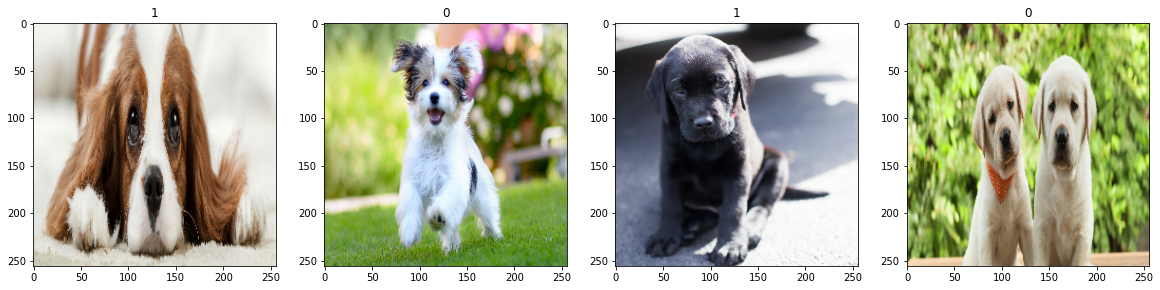

In [24]:
fig,ax = plt.subplots(ncols=4,figsize=(20,10))
for idx,img in enumerate(Batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(Batch[1][idx])


## 2.2 Split Data

In [25]:
len(data)


5

In [58]:
train_size = int(len(data)*.7)
val_size  = int(len(data)*.1)+1
test_size  = int(len(data)*.1)+1

In [59]:
train_size+ val_size + test_size

5

In [60]:
training_data = data.take(train_size)
validation_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size+val_size).take(test_size)

->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->*->

## 3.0 Model Building

##### 3.1 Build a deep model

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Dense,Conv2D,Flatten

In [83]:
model = Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation="sigmoid"))


In [84]:
model.compile(optimizer = "adam",loss=tf.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

In [86]:
logs = 'logs_dir'
callbacks = tf.keras.callbacks.TensorBoard(log_dir=logs)

In [87]:
hist = model.fit(training_data,epochs=15,validation_data=validation_data,callbacks=[callbacks])

Epoch 1/15
3/3 [==============================] - 3s 747ms/step - loss: 1.8981 - accuracy: 0.4375 - val_loss: 0.8454 - val_accuracy: 0.4062
Epoch 2/15
3/3 [==============================] - 2s 695ms/step - loss: 0.7884 - accuracy: 0.5104 - val_loss: 0.7133 - val_accuracy: 0.5000
Epoch 3/15
3/3 [==============================] - 2s 651ms/step - loss: 0.6883 - accuracy: 0.5312 - val_loss: 0.6767 - val_accuracy: 0.6562
Epoch 4/15
3/3 [==============================] - 4s 846ms/step - loss: 0.6878 - accuracy: 0.5000 - val_loss: 0.6846 - val_accuracy: 0.5625
Epoch 5/15
3/3 [==============================] - 2s 618ms/step - loss: 0.6608 - accuracy: 0.5729 - val_loss: 0.6817 - val_accuracy: 0.4062
Epoch 6/15
3/3 [==============================] - 2s 614ms/step - loss: 0.6553 - accuracy: 0.5521 - val_loss: 0.6604 - val_accuracy: 0.5312
Epoch 7/15
3/3 [==============================] - 3s 699ms/step - loss: 0.6219 - accuracy: 0.6354 - val_loss: 0.5670 - val_accuracy: 0.8438
Epoch 8/15
3/3 [====

In [88]:
hist.history

{'loss': [1.8981364965438843,
  0.7883648872375488,
  0.6883252263069153,
  0.68779057264328,
  0.6608275771141052,
  0.6553117632865906,
  0.6219365000724792,
  0.5844618678092957,
  0.5260651111602783,
  0.4565163552761078,
  0.42944732308387756,
  0.38010334968566895,
  0.3706667721271515,
  0.2727185785770416,
  0.2291809767484665],
 'accuracy': [0.4375,
  0.5104166865348816,
  0.53125,
  0.5,
  0.5729166865348816,
  0.5520833134651184,
  0.6354166865348816,
  0.7395833134651184,
  0.7916666865348816,
  0.84375,
  0.78125,
  0.875,
  0.8645833134651184,
  0.9375,
  0.9375],
 'val_loss': [0.845427393913269,
  0.7133312225341797,
  0.6766818165779114,
  0.6845923662185669,
  0.6816907525062561,
  0.6603816747665405,
  0.5670255422592163,
  0.562044620513916,
  0.5074906349182129,
  0.34719008207321167,
  0.3996264934539795,
  0.36109745502471924,
  0.2799273133277893,
  0.29013362526893616,
  0.22312048077583313],
 'val_accuracy': [0.40625,
  0.5,
  0.65625,
  0.5625,
  0.40625,
  0.

### 3.2 plotting performanse

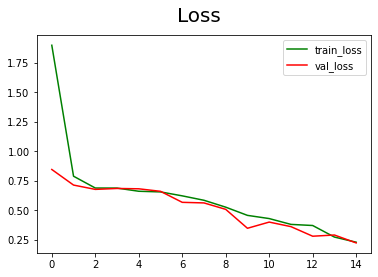

In [89]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'green',label='train_loss')
plt.plot(hist.history['val_loss'],color ='red',label='val_loss')
fig.suptitle("Loss",fontsize=20)
plt.legend(loc = 'upper right')
plt.show()


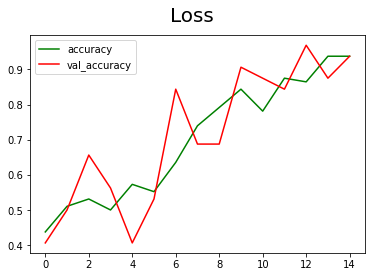

In [90]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'green',label='accuracy')
plt.plot(hist.history['val_accuracy'],color ='red',label='val_accuracy')
fig.suptitle("Loss",fontsize=20)
plt.legend(loc = 'upper left')
plt.show() 

# 4.0 Evaluating Performance

### 4.1 metrics

In [91]:
from tensorflow.keras.metrics import Recall,Precision,BinaryAccuracy

In [92]:
recall = Recall()
precision = Precision()
accuracy = BinaryAccuracy()

In [93]:
len(test_data)

1

In [94]:
for batch in test_data.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  recall.update_state(y,yhat)
  precision.update_state(y,yhat)
  accuracy.update_state(y,yhat)

In [95]:
print(f"precision is {precision.result().numpy()},recall is {recall.result().numpy()},accuracy is {accuracy.result().numpy()}")

precision is 0.8571428656578064,recall is 1.0,accuracy is 0.8999999761581421


In [ ]:
model.save(os.path.join('model','model.h5'))

### 4.2 Prediction

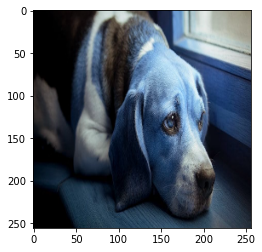

In [4]:
resized_image = tf.image.resize(image,(256,256))
plt.imshow(resized_image.numpy().astype(int))
plt.show()

In [4]:
import numpy as np
from tensorflow.keras.models import load_model

In [1]:
def sentiment_prediction(image):
    new_model = load_model("model.h5")
    image = cv2.imread(image)
    resized_image = tf.image.resize(image,(256,256))
    yhat = new_model.predict(np.expand_dims(resized_image/255,0))
    if yhat < 0.5:
        print("puppy is feeling happy")
    else:
        print("puppy is in sad mood")

    

In [9]:
sentiment_prediction("happy.jpg")

1/1 [==============================] - 0s 102ms/step
puppy is feeling happy
